Mount my Google Drive

*   For backup
*   For storage
*   For file transfer






In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir="/content/gdrive/My drive"
base_dir=root_dir+"fastai-v3"

Mounted at /content/gdrive


In [3]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


Import some libraries and modules for performing some operation

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Setup batch size i.e. size of processing image at one time

In [0]:
bs=64


In [6]:
!wget https://www.dropbox.com/s/ycxxchu4q80vdkw/data.zip

--2019-10-01 17:49:19--  https://www.dropbox.com/s/ycxxchu4q80vdkw/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ycxxchu4q80vdkw/data.zip [following]
--2019-10-01 17:49:19--  https://www.dropbox.com/s/raw/ycxxchu4q80vdkw/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c74a6d1d2b1eb71640b8384fa.dl.dropboxusercontent.com/cd/0/inline/ApmVjGU5wnlty35cxPGGQUtbcrT0IAVewcSbKIT32EMc0zWDFUEly43m5pzc29H2dRkNS_YFvuVuhysCN7wT14CgwiQ_9fN6Bsruh4mrqMqRGQ/file# [following]
--2019-10-01 17:49:20--  https://uc8c74a6d1d2b1eb71640b8384fa.dl.dropboxusercontent.com/cd/0/inline/ApmVjGU5wnlty35cxPGGQUtbcrT0IAVewcSbKIT32EMc0zWDFUEly43m5pzc29H2dRkNS_YFvuVuhysCN7wT14CgwiQ_9fN6Bsruh4mrqMqRGQ/file
Resolving uc8c74a6d1d2b1eb71640

In [7]:
!apt-get install unzip
!unzip data.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Archive:  data.zip
   creating: train/
   creating: train/ben_afflek/
  inflating: train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmo

In [8]:
import os
os.listdir(os.getcwd())

['.config', 'models', 'data.zip', 'val', 'train', 'data', 'gdrive']

In [0]:
data = ImageDataBunch.from_folder(path=os.getcwd(), train='train', valid='val',size=224,bs=8)



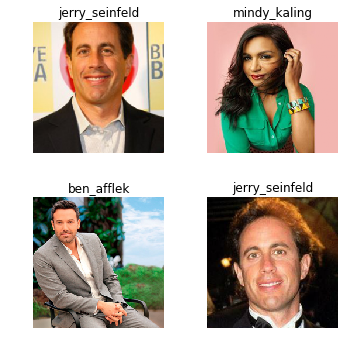

In [24]:
data.show_batch(rows=2, figsize=(5,5))


In [11]:
len(data.classes),data.c

(5, 5)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 74.4MB/s]


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.235211,0.959470,0.320000,00:03
1,1.294221,1.052806,0.240000,00:01
2,0.895405,0.493554,0.120000,00:01
3,0.686052,0.397442,0.160000,00:01


In [0]:
learn.save("stage-1")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

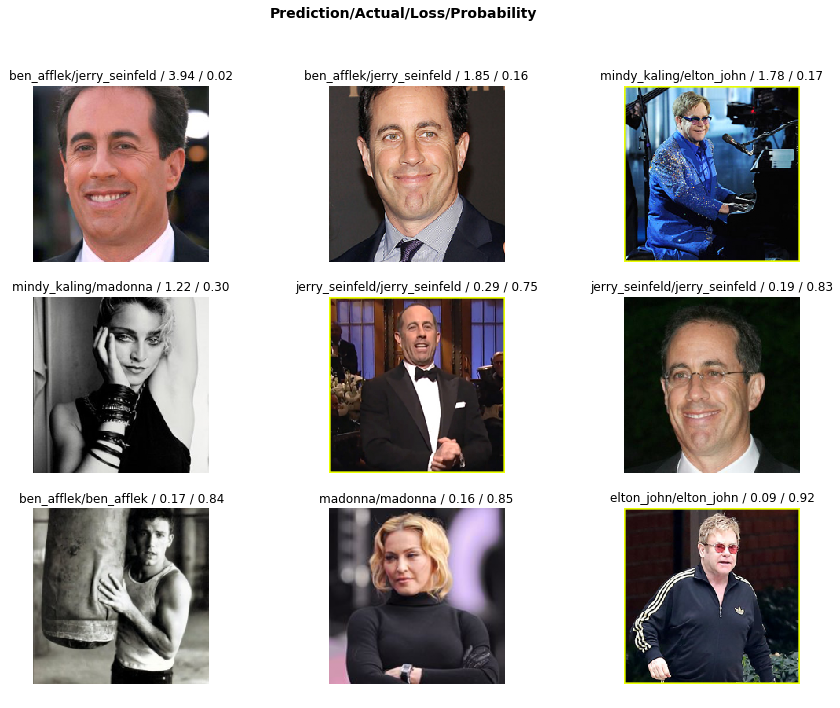

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

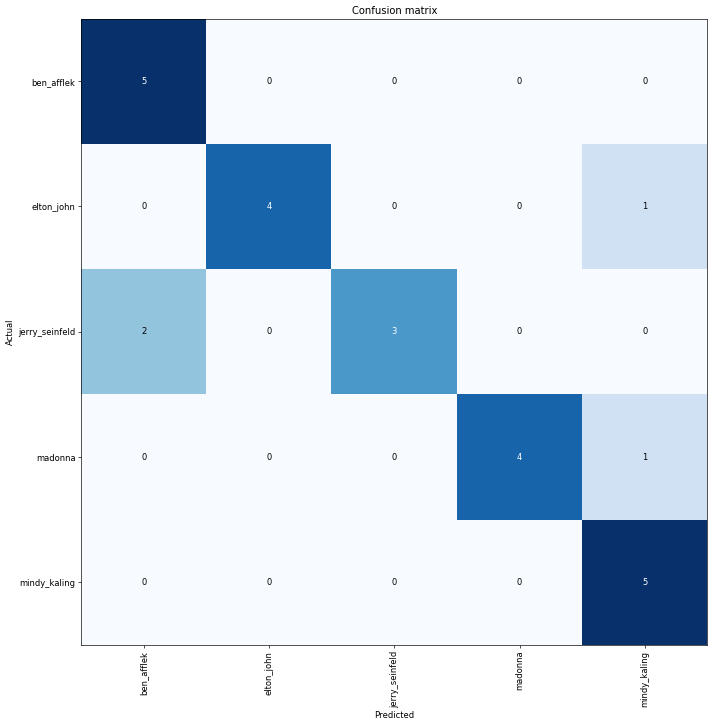

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
cd /content/models

/root/.torch/models


In [19]:
ls

stage-1.pth


In [0]:
!cp stage-1.pth "/content/gdrive/My Drive/model/"

In [0]:
torch.save(cnn_learner, "/content/gdrive/My Drive/model/face_recognition.pkl")